In [ ]:
install.packages("pvclust")

In [1]:
library(parallel)
library (pvclust)

In [2]:
tumor_gene_expression_file<- "/sbgenomics/project-files/tumor-gene-expression-rsem-tpm-collapsed.tsv"

In [3]:
tumor_gene_expression <- read.table(tumor_gene_expression_file, header=TRUE, row.names=1, sep="\t")

In [4]:
head (tumor_gene_expression)


,BS_DERH44Z2,BS_CXGWN1W5,BS_QS2NKZW3,BS_135GYQQD,BS_HBMHZEGZ,BS_MPE34NYZ,BS_94ZKC2SR,BS_SM1QE9FJ,BS_STTGK8V4,BS_XFFQR05Z,⋯,BS_ECNBQ2RA,BS_B57327NA,BS_9TXEDSWB,BS_SY3J3XR9,BS_TR2P8KRF,BS_WBVSK3MP,BS_9FX3YREK,BS_RJC3WDD6,BS_G5NHSFD4,BS_JTWNJ8T7
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MT-CO3,7458.52,3883.93,4849.37,1335.70,2647.82,4706.53,3848.63,3926.75,2301.56,6619.17,⋯,3843.52,11515.25,2843.97,4626.27,4796.54,4992.13,5830.48,2179.96,2388.52,2741.33
MT-CO2,8288.59,3047.39,3168.87,1378.69,2342.92,2274.70,2008.71,3315.94,1864.12,5765.39,⋯,1811.11,8329.16,3435.33,3968.08,4673.94,3251.86,4614.71,2043.98,1896.64,2206.07
MT-ATP6,6606.88,2996.46,3003.09,932.80,2144.00,2194.50,2166.25,2888.90,1567.04,5971.82,⋯,3851.08,13919.83,2049.76,3449.36,6068.35,4992.31,6300.63,2057.34,2459.10,2272.85
MT-ND4,6398.61,4019.43,4011.17,1572.16,3229.79,2909.59,2758.86,3899.71,3052.46,7549.45,⋯,3487.04,11354.66,2531.62,4394.46,5684.24,4569.99,6504.24,2024.25,2654.99,2606.61
MT-CO1,10211.13,5824.88,6941.22,2357.34,4461.07,5387.36,4785.09,6413.92,4034.43,8812.22,⋯,6430.97,8514.92,5633.70,6202.14,5720.83,3777.03,7596.47,2522.74,3030.33,3247.08
MT-RNR2,2.04,2.51,23.16,0.48,1.39,9.50,6.23,1.31,1.11,1.11,⋯,0.31,9.79,145.05,15.55,2.61,2.01,24.07,31.23,152.38,49.55


In [5]:
dim(tumor_gene_expression)

[1] 36718  1284

In [6]:
patient_cluster_matrix <- t(tumor_gene_expression)

In [7]:
patient_cluster_matrix[1:4,1:4]

,MT-CO3,MT-CO2,MT-ATP6,MT-ND4
BS_DERH44Z2,7458.52,8288.59,6606.88,6398.61
BS_CXGWN1W5,3883.93,3047.39,2996.46,4019.43
BS_QS2NKZW3,4849.37,3168.87,3003.09,4011.17
BS_135GYQQD,1335.70,1378.69,932.80,1572.16


In [8]:
reduced_pcm <- patient_cluster_matrix[1:100, 1:100]

In [9]:
head(reduced_pcm)

,MT-CO3,MT-CO2,MT-ATP6,MT-ND4,MT-CO1,MT-RNR2,MT-CYB,MT-ND2,MT-ND1,MT-ATP8,⋯,HLA-A,VIM,IGKJ1,RPL24,MTND2P28,HBA1,S100A8,DUSP1,FABP4,NPPA
BS_DERH44Z2,7458.52,8288.59,6606.88,6398.61,10211.13,2.04,3267.50,5137.50,4806.10,11633.16,⋯,103.46,177.85,0,269.97,39.72,8.06,0.60,40.88,4.18,0.00
BS_CXGWN1W5,3883.93,3047.39,2996.46,4019.43,5824.88,2.51,1691.26,2157.91,3666.67,5305.92,⋯,81.40,111.23,0,237.11,13.44,27.08,1.40,33.70,0.46,0.00
BS_QS2NKZW3,4849.37,3168.87,3003.09,4011.17,6941.22,23.16,2616.85,3322.97,5265.57,3805.77,⋯,198.27,187.38,0,234.45,33.85,49.98,11.25,93.32,4.34,0.00
BS_135GYQQD,1335.70,1378.69,932.80,1572.16,2357.34,0.48,687.46,846.49,965.47,1048.87,⋯,44.92,467.87,0,267.50,14.69,6.79,0.49,21.04,0.48,0.02
BS_HBMHZEGZ,2647.82,2342.92,2144.00,3229.79,4461.07,1.39,1638.03,2052.57,2867.30,3588.04,⋯,140.03,150.95,0,247.91,30.93,2.35,0.28,35.75,4.40,0.00
BS_MPE34NYZ,4706.53,2274.70,2194.50,2909.59,5387.36,9.50,1818.10,2056.24,2924.80,2977.77,⋯,50.15,75.91,0,383.11,30.68,347.38,1.24,16.86,5.45,4.74


In [10]:
reduced_pcm_t <- t(reduced_pcm)

In [11]:
numCores <-detectCores()
numCores

[1] 36

In [ ]:
# makeCluster is not allowing more than 10 cores to be made

In [12]:
cl <- makeCluster(10)

In [ ]:
#"parPvclust" has been integrated into pvclust (with "parallel" option).
# It is available for back compatibility but will be unavailable in the future.”

In [16]:
pcm_t.pv <- parPvclust(cl, reduced_pcm_t, method.hclust="average",
           method.dist="correlation", use.cor="pairwise.complete.obs",
           nboot=1000, r=seq(.5,1.4,by=.1), store=FALSE, weight=FALSE,
           init.rand=NULL, iseed=NULL, quiet=FALSE)

Warning message in parPvclust(cl, reduced_pcm_t, method.hclust = "average", method.dist = "correlation", :
“"parPvclust" has been integrated into pvclust (with "parallel" option).
It is available for back compatibility but will be unavailable in the future.”


Multiscale bootstrap... Done.


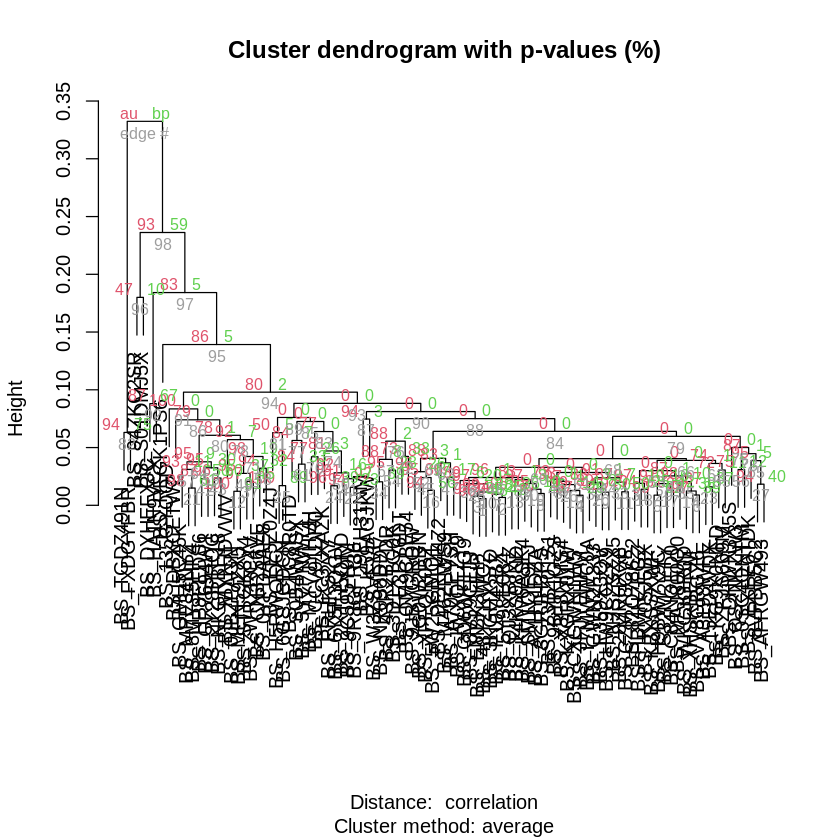

In [17]:
p <-plot(reduced_pcm_t.pv)

In [ ]:
x <- seplot(reduced_pcm_t.pv, identify=TRUE)

In [ ]:
pvrect(p)

In [ ]:
reduced_pcm_t.pv$labels

In [ ]:
pick <- pvpick(reduced_pcm_t.pv, alpha=0.60, pv="au", type="geq", max.only=TRUE)

In [ ]:
cluster_assignments <- do.call('rbind',lapply(1:length(pick$clusters),function(i){
    cbind(rep(i,length(pick$clusters[[i]])),pick$clusters[[i]])
}))
colnames(cluster_assignments) <- c("cluster","biospecimen")

In [ ]:
cluster_assignments

In [ ]:
write.csv(cluster_assignments, "cluster_assignments.csv",row.names=FALSE)